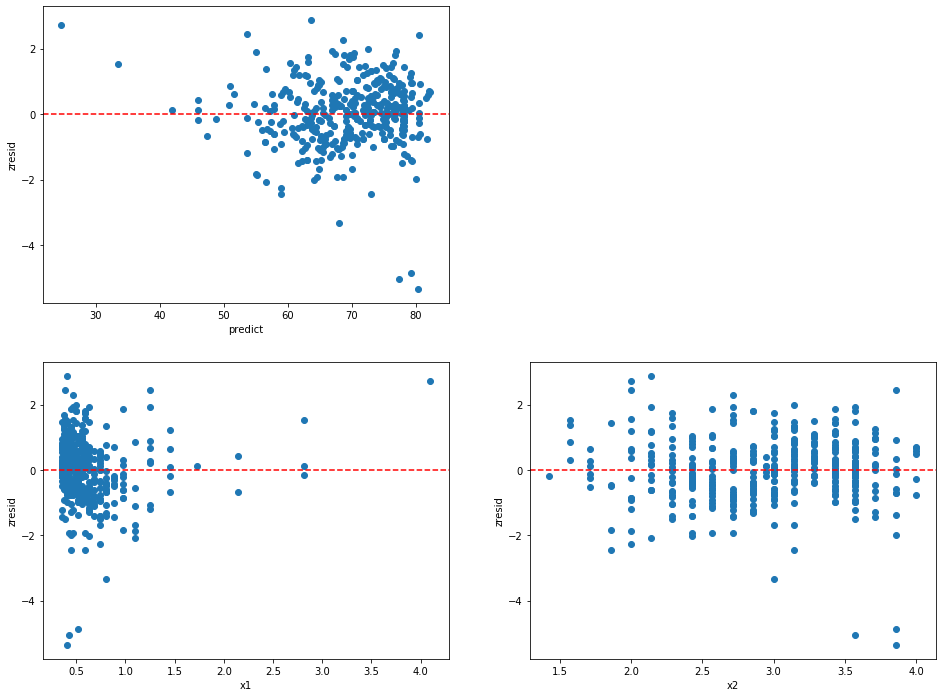

In [2]:
#导入包
import numpy as np
import pandas as pd
import matplotlib as mpl
import statsmodels.formula.api as smf
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data=pd.read_excel("C:\\Users\\有福有德\Desktop\\上海统计分析python20200418\\data\\运动1.xlsx")
data.head(6)#tail(6),data.columus

# ====== 线性回归======
result=smf.ols("体重~运动时间+骑行时间",data=data).fit()
result.summary()
#"绩效总分~适应总分+np.log(情绪总分)"自变量取对数

# ====== 残差图======
plt.figure(figsize=(16,12))

plt.subplot(221)#2行2列的第1位置，位置按从左到右，从上到下的顺序数。
zres=(result.resid-result.resid.mean())/result.resid.std()
plt.scatter(result.predict(),zres)
plt.xlabel("predict")
plt.ylabel("zresid")
plt.axhline([0],color = 'r',ls="--")

plt.subplot(223)
x1=data.iloc[:,4]
plt.scatter(x1,zres)
plt.xlabel("x1")
plt.ylabel("zresid")
plt.axhline([0],color = 'r',ls="--")

plt.subplot(224)
x2=data.iloc[:,5]
plt.scatter(x2,zres)
plt.xlabel("x2")
plt.ylabel("zresid")
plt.axhline([0],color = 'r',ls="--")


In [3]:
# ====== 异方差检验 ======
import statsmodels.stats.api as sms
# White’s Lagrange Multiplier Test for Heteroscedasticity
res=sms.diagnostic.het_white(result.resid,exog=result.model.exog)
print("LM:",res[0])
print("LM_p:",res[1])


LM: 11.095592670448365
LM_p: 0.04951726036127899


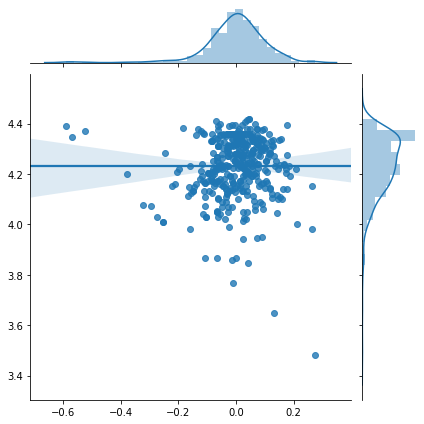

In [4]:
# ====== 消除异方差 ======
#log变换、增加有效的x、WLS、稳健回归等方法

#log变换
reslog=smf.ols("np.log(体重)~运动时间+骑行时间",data=data).fit()
reslog.summary()
sns.jointplot(reslog.resid,reslog.predict(),kind="reg")#reg"|"resid"|"kde"|"hex"